# Example: REV analysis for correlation functions

This example shows the functionality of REVAnalyzer library and the structure of output for vector metric REV
analysis taking correlation functions (CF) as the example. 

[1] Debye, P., Anderson Jr, H. R., & Brumberger, H. (1957). Scattering by an inhomogeneous solid. II. The correlation function and its application. Journal of Applied Physics, 28(6), 679-683.

[2] Lu, B., & Torquato, S. (1992). Lineal-path function for random heterogeneous materials. Physical Review A, 45(2), 922.

[3] Torquato, S., Beasley, J. D., & Chiew, Y. C. (1988). Two‐point cluster function for continuum percolation. The Journal of chemical physics, 88(10), 6540-6547.

[4] Ma, Z., & Torquato, S. (2018). Precise algorithms to compute surface correlation functions of two-phase heterogeneous media and their applications. Physical Review E, 98(1), 013307.

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import S2, ChordLength
from revanalyzer.vectorizers import CFVectorizer, HistVectorizer

<img src="fig_subcubes.png" alt="Drawing" style="width: 600px;"/>

To analyze both deterministic and statistical REVs, one should make the proper selection of subcubes from analyzed 3D sample images. We select a set of growing subcubes SC$_k$($i$) from the center and all the corners of the sample, as it is shown in Figure. We take subcube linear size $L_i = L_0 + i \Delta L$ with increment step $\Delta L$ and 
$L_0 = \Delta L$.

The reliable sREV analysis is possible only if subcubes do not overlap or their overlap is limited. Therefore, we introduce the $L_{sREV}$ parameter. For  $L \leq L_{sREV}$, we cut from the considered sample all 9 subcubes SC$_k$($i$) with $k$ = 0,1,.,8. For $L > L_{sREV}$, only the center subcubes SC$_0$($i$) are cut.

In [2]:
#initialization

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = 300 #image linear size. Note, that only cubical images can be analyzed. 
cut_step = 50 # increment step of subcube size (\Delta L)
sREV_max_size = 200 #maximal subcube size for which sREV analysis is performed (L_{sREV}).
datadir = 'data' # path to folder containing image, default: None
outputdir = 'output' # path to outputfolder containig image, default: 'output'
n_threads = 32 #number of CPU cores used for parallel metric computation for different subcubes, default: 1

norm = 2 
#Norm of vectors used in REV analysis. The same, as parameter 'ord' in numpy.linalg.norm function; 
#default: 2.

mode = 'max' 
#can be 'all' or 'max'. If mode = 'all', CF calculated for 'x', 'y' and 'z' directions are concatenate into one
#vector during vectorization. If mode = 'max', CF calculared for different directions are vectorizes independently.
#Then at the analisys step, maximal differences and deviations over 3 directions are taking for REV sizes calculation.

vectorizer = CFVectorizer(norm = norm, mode = mode) #vectorizer inizialization

show_time = True #default: False. Added to monitor time cost for large images.

normalize = True #default: True. If True, CF are normalized to satisfy the condition CF(0) = 1. 
#See the details in Karsanina et al. (2021). Compressing soil structural information into parameterized correlation 
#functions. European Journal of Soil Science, 72(2), 561-577.

metric = S2(vectorizer = vectorizer, n_threads = n_threads, show_time = show_time, normalize = normalize) #metric initialization. Here, we take S_2 correlation function.

analyzer = REVAnalyzer(metric = metric, image = image, cut_step = cut_step, sREV_max_size = sREV_max_size,
                       datadir = datadir, outputdir = outputdir)


In [3]:
#generate metric data for all the subcubes
analyzer.generate()

cut  cut1_50 , run time: 
--- 16.815595149993896 seconds ---
cut  cut0_50 , run time: 
--- 16.941662549972534 seconds ---
cut  cut2_50 , run time: 
--- 16.86711049079895 seconds ---
cut  cut3_50 , run time: 
--- 16.964252948760986 seconds ---
cut  cut4_50 , run time: 
--- 17.055012226104736 seconds ---
cut  cut7_50 , run time: 
--- 16.880454540252686 seconds ---
cut  cut6_50 , run time: 
--- 17.028139114379883 seconds ---
cut  cut8_50 , run time: 
--- 16.907493114471436 seconds ---
cut  cut3_100 , run time: 
--- 17.07667827606201 seconds ---
cut  cut1_100 , run time: 
--- 17.234686374664307 seconds ---
cut  cut2_100 , run time: 
--- 17.210486888885498 seconds ---
cut  cut4_100 , run time: 
--- 17.201833724975586 seconds ---
cut  cut5_100 , run time: 
--- 17.2747802734375 seconds ---
cut  cut5_50 , run time: 
--- 17.968229055404663 seconds ---
cut cut   cut0_100cut7_100 , run time:  
, run time: --- 17.77414107322693 seconds ---

--- 17.30632781982422 seconds ---
cut  cut8_100 , run tim

In [4]:
#one can read the metric value from the specific subcube. Output format is numpy array. 
#As we chose mode = 'max', it consists of 3 arrays corresponding to 3 directions. 
cut_size = 150
cut_id = 5
value = analyzer.read(cut_size, cut_id)
print(value)

[array([ 1.        ,  0.89816778,  0.7975946 ,  0.69922063,  0.60410397,
        0.51342218,  0.4284998 ,  0.35074416,  0.28122831,  0.22056117,
        0.16888426,  0.12586033,  0.09072777,  0.06226059,  0.03956102,
        0.02114798,  0.00667652, -0.00474844, -0.01361289, -0.02063316,
       -0.02587744, -0.02986095, -0.03274695, -0.03466998, -0.03571098,
       -0.03584131, -0.0354219 , -0.03471143, -0.03386671, -0.03278244,
       -0.03123606, -0.0291138 , -0.02678763, -0.02416441, -0.02170228,
       -0.01909165, -0.01714862, -0.01537472, -0.01371603, -0.01234412,
       -0.01154724, -0.0113498 , -0.01169401, -0.01239062, -0.01345666,
       -0.01466409, -0.01594327, -0.01752138, -0.0190113 , -0.02039744,
       -0.02178699, -0.02323483, -0.02476373, -0.02619116, -0.02719846,
       -0.02796521, -0.0288139 , -0.02977534, -0.03086132, -0.03227113,
       -0.03349207, -0.03476145, -0.03616591, -0.03707616, -0.03781843,
       -0.03836702, -0.03839671, -0.03755313, -0.03603232, -0.0

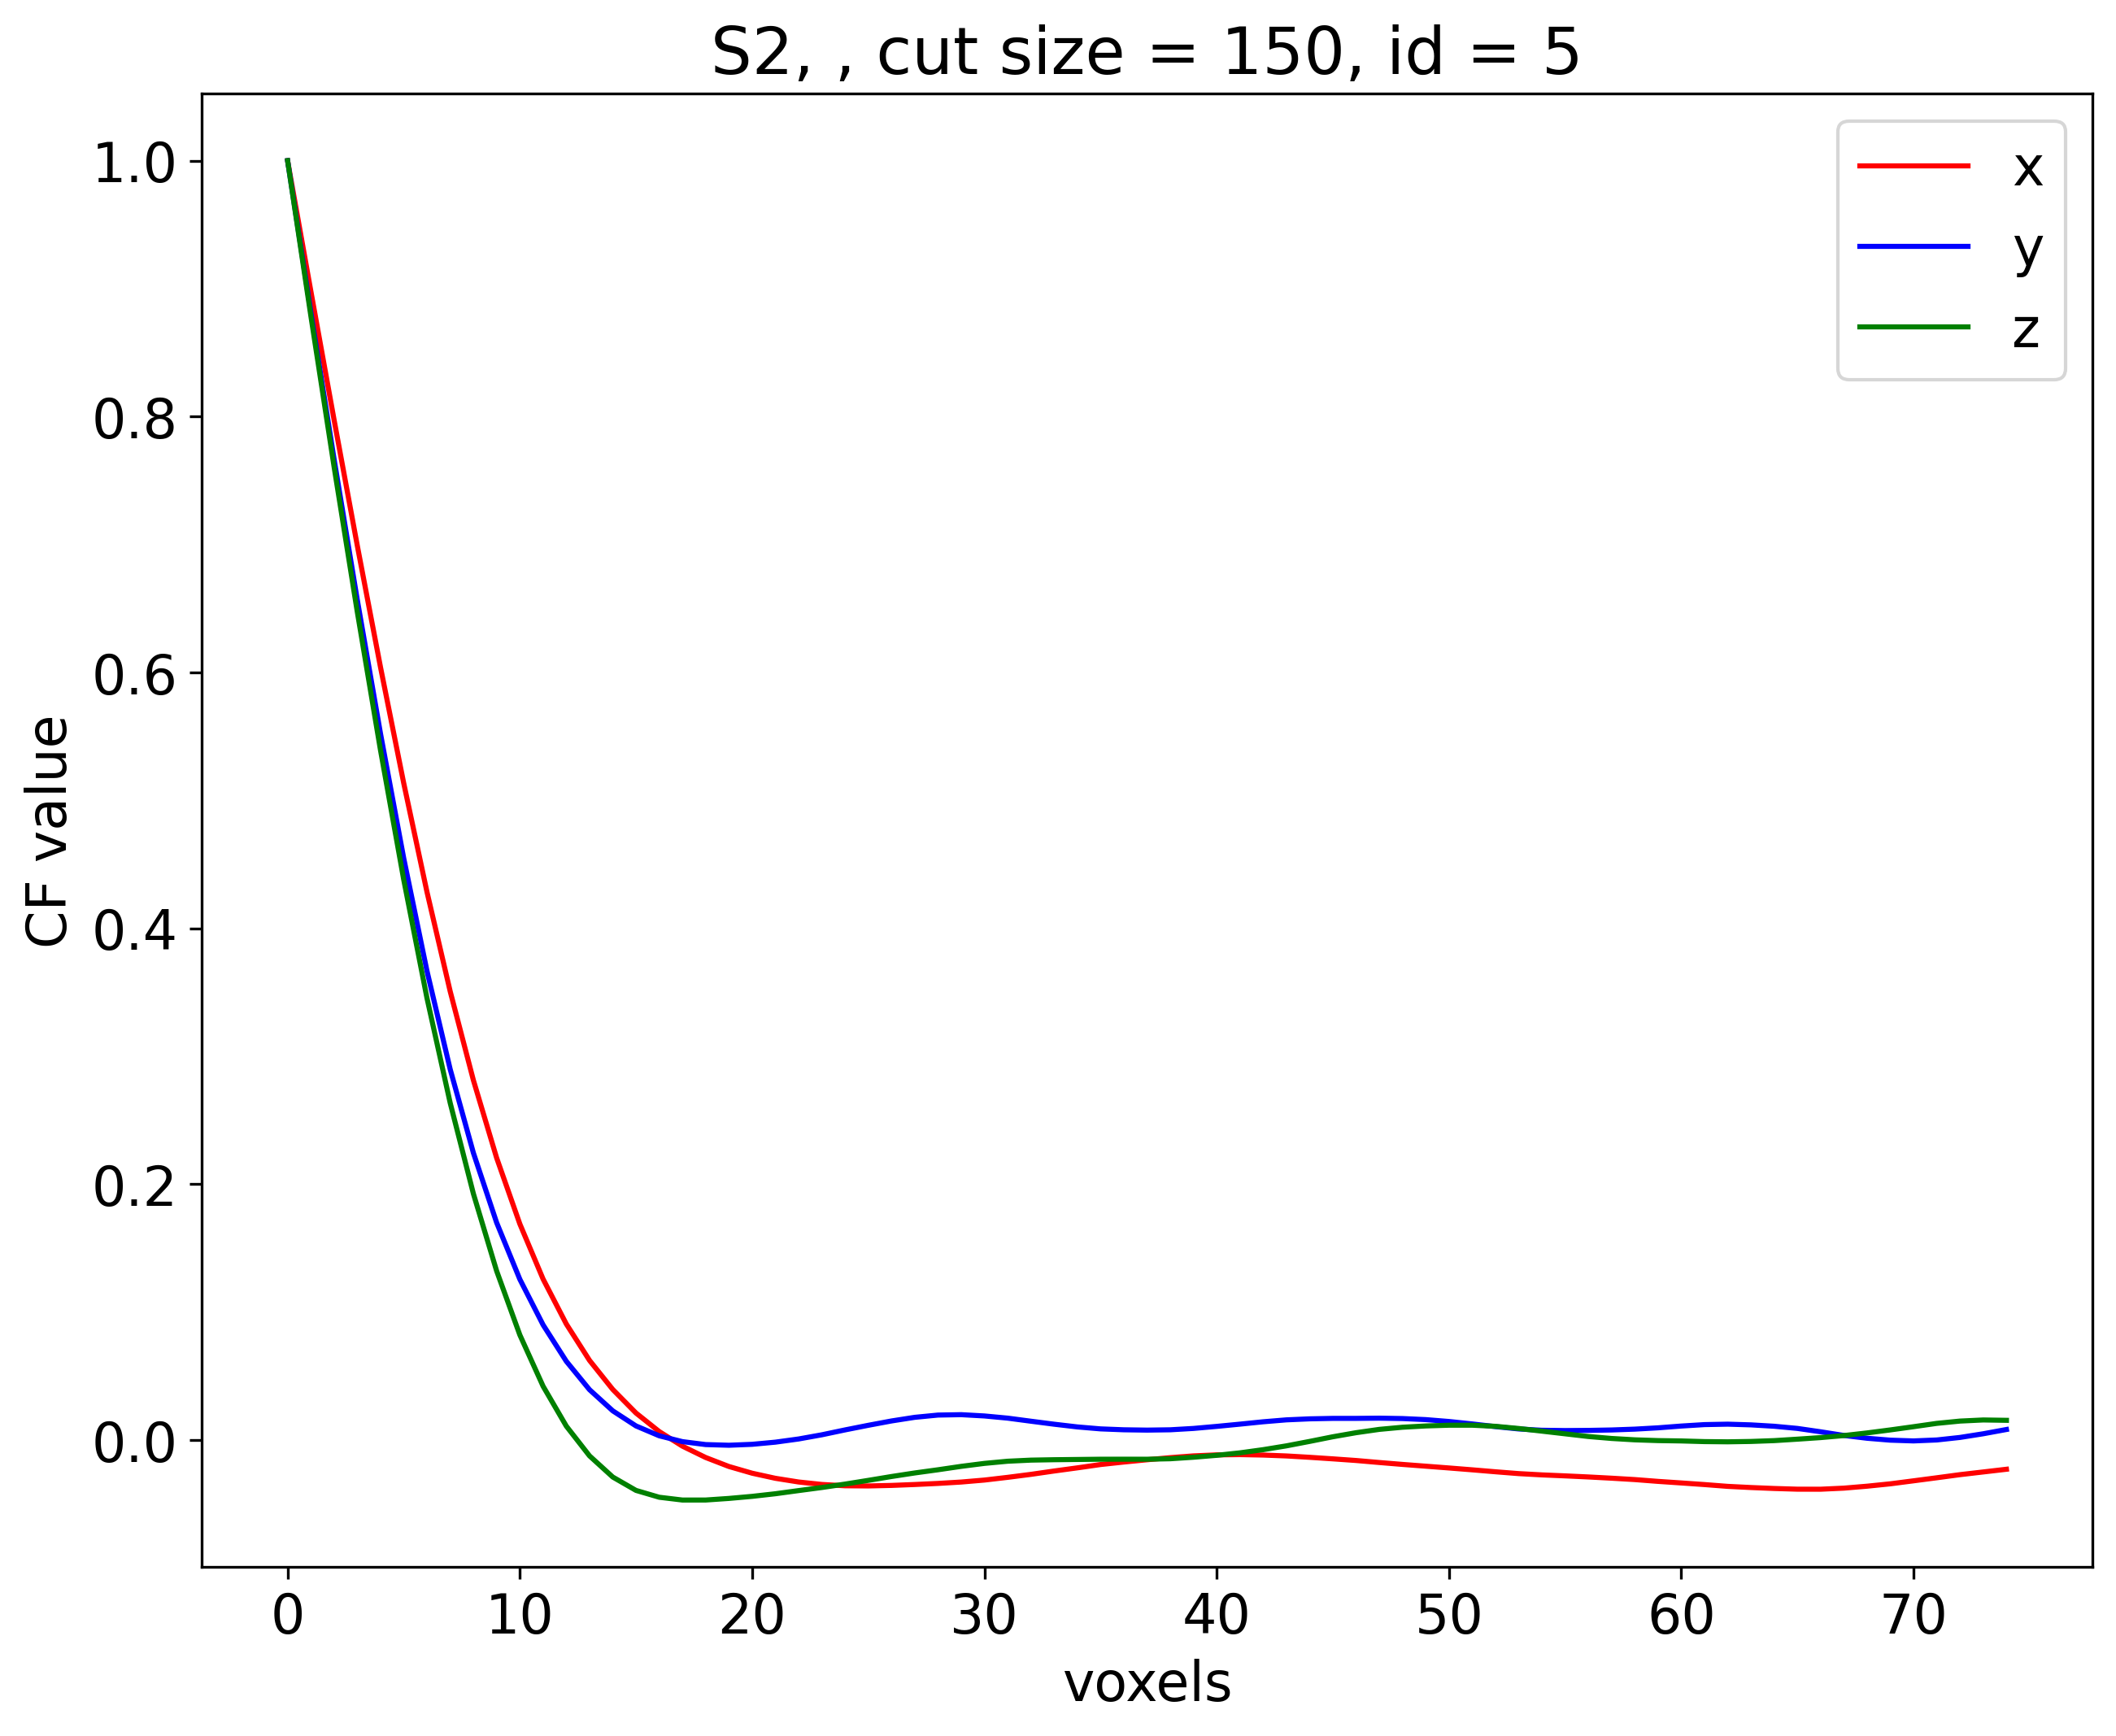

In [5]:
#One can visualize vector metric for each subcube:
analyzer.show(150, 5)

During the vectorization of generated values for vector metric $\mathbf{V}$, at each cut step $i$ subcubes SC$_k$($i$) and SC$_l$($i+1$) are taken. Then: 1) for each pair of indices ($k$,$l$) the vector $\mathbf{V}_{l(i+1)}$ is modified to the vector $\mathbf{V^*}_{l(i+1)}$ to have the same number of bins and range as the vector  $\mathbf{V}_{k(i)}$ (see documentation for details); 2) normalized distance between the vectors $\mathbf{V^*}_{l(i+1)}$ and
$\mathbf{V}_{k(i)}$ is computed:

$\delta(i,k,l) = 2 \frac{||\mathbf{V^*}_{l(i+1)} - \mathbf{V}_{k(i)}||}{||\mathbf{V^*}_{l(i+1)}||+||\mathbf{V}_{k(i)}||}$.

Order of the vector norm ||$\mathbf{V}$|| is the input parameter of any vectorizer used in the library.

In [6]:
#vectorization
analyzer.vectorize()

In [7]:
#the results of vectorization are available in the subdirectory which is created in output directory:
analyzer._outputdir_vectorized_cut_values

'output/ceramic300/S2/vectorized_cuts_values'

In [8]:
#This subdirectory contains json files with names 'cut_l', where l is the linear size of subcube.
import os
os.listdir(analyzer._outputdir_vectorized_cut_values)

['cut_150', 'cut_200', 'cut_100', 'cut_250', 'cut_50']

Each file 'cut_l' contains a dictionary.A key of its element is a pair of subcube indices ($k$,$l$), and a value -
list of 3 elements: $\mathbf{V}_{k(i)}$, $\mathbf{V^*}_{l(i+1)}$ and $\delta(i,k,l)$. If we have a case of CF metric with 'max' mode, each element of this list is a sublist of three directional components.

In [9]:
#to get sREV and dREV sizes one should fix correponding thresholds. Then we can analyze the vectorized data.
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

For the estimation of dREV and sREV sizes for vector metric, fist we calculate mean values $\bar{\delta}(i)$ over all pairs of indices ($k$,$l$) and its standard deviation $\sigma_i$.  $\sigma_{norm}(i) = / \bar{S_i}$.

Then for the estimation of dREV size we use the following formula:

$m: \forall i \ge m$, $\bar{\delta}(i) < \varepsilon_{dREV}$ (dREV_size_1),

where $\varepsilon_{dREV}$ is dREV threshold.

For the estimation of sREV size we use two following formulas:

$m: \forall i \ge m$, $\sigma_{norm1}(i) = \sigma_i/ \varepsilon_{dREV} < \varepsilon_{sREV}$ (sREV_size_1), 

and

$m: \forall i \ge m$, $\sigma_{norm2}(i) = \sigma_i/ D(i) < \varepsilon_{sREV}$ (sREV_size_2), 

where $D(i) = \varepsilon_{dREV}$, if $\bar{\delta}(i) < \varepsilon_{dREV}$ and $D(i) = \bar{\delta}(i)$ if
$\bar{\delta}(i) \ge \varepsilon_{dREV}$; $\varepsilon_{sREV}$ is sREV threshold.

In the case of CF metric with 'max' mode, we separately calculate $\bar{\delta}(i)$, $\sigma_i$, dREV and sREV sizes for $x$, $y$ and $z$ directions and take the maximal values over all directions.  

Attributes metric_mean, metric_std, metric_normed_std1, normed_std2 represent the values $\bar{\delta}(i)$,  $\sigma_i$,  $\sigma_{norm1}(i)$ and $\sigma_{norm2}(i)$

In [10]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{100: 0.2226965054415008, 150: 0.1363118391483968, 200: 0.09690222905984598, 250: 0.07463137963060947, 300: 0.06613446912193449}
{100: 0.09948386789919124, 150: 0.053983966726833234, 200: 0.034812134690645966, 250: 0.028096167636088267}
{100: 0.4974193394959562, 150: 0.26991983363416616, 200: 0.17406067345322981, 250: 0.14048083818044133}
{100: 0.5223908548331825, 150: 0.26991983363416616, 200: 0.17406067345322981, 250: 0.14048083818044133}


In [11]:
#get dREV and sREV size estimation
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

150
200
200


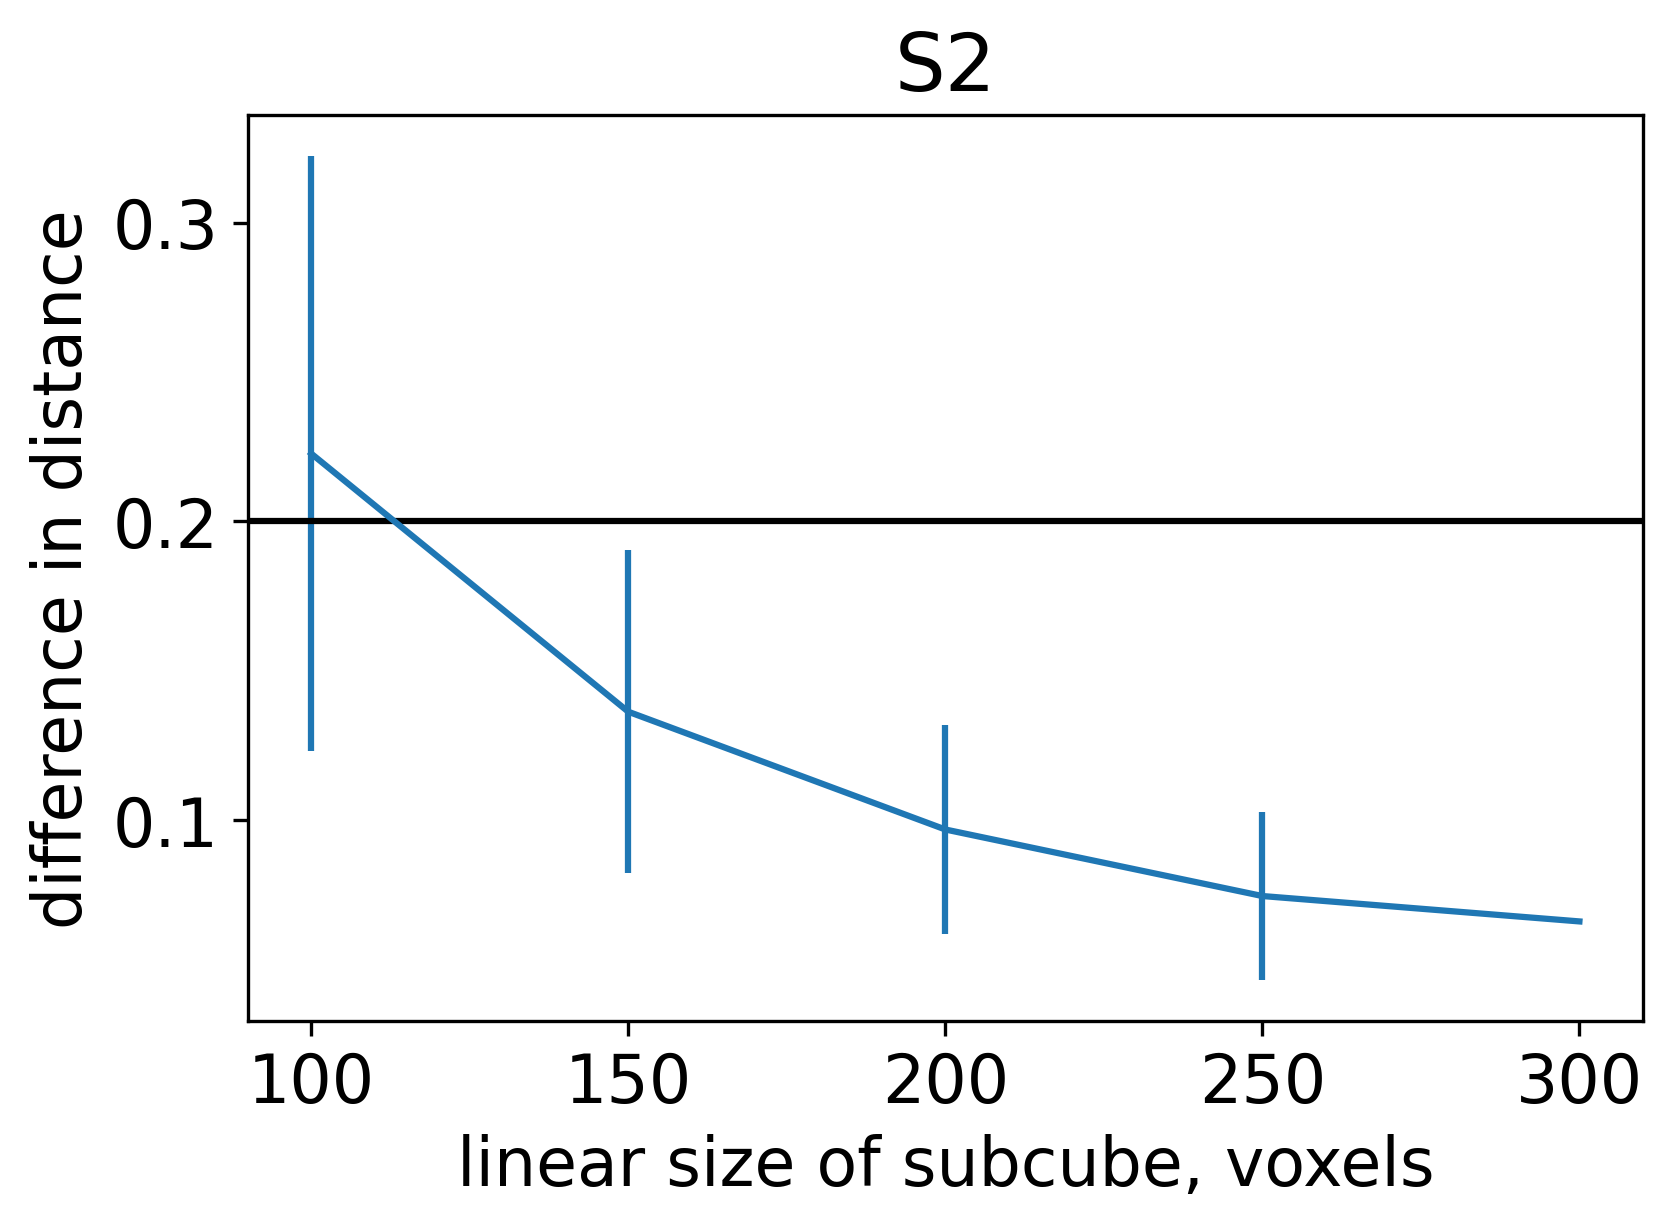

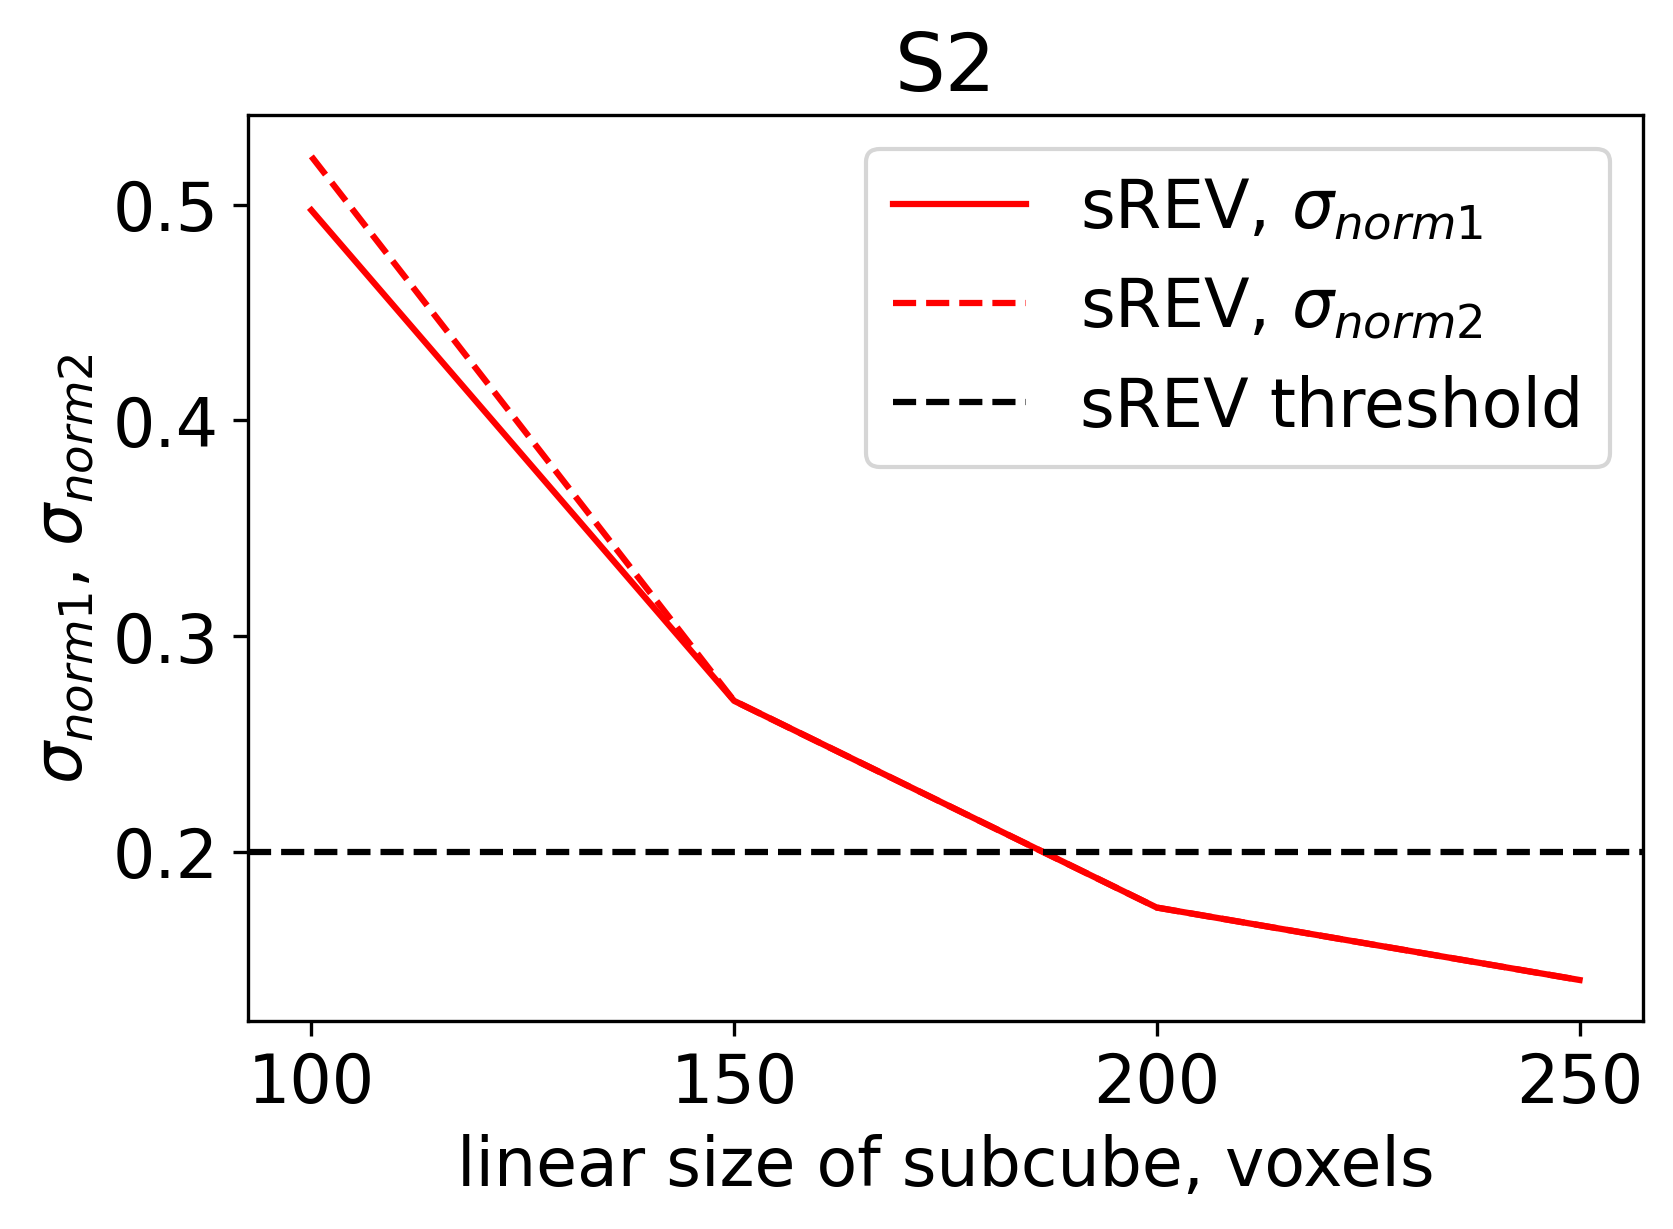

In [12]:
#the results of REV analysis can be visualized. The first figure presents mean and std values (as errorbars) 
#of difference in distance between subcubes of neighbour sizes as the function of subcube linear size. 
#The second one - the dependece of \sigma_{norm1} and \sigma_{norm2} alculated as in Eqs. above. 
#One can visually estimate dREV and sREV sizes from this figure, as well.
#These figures are saved as .png in the subdirectory analyzer.outputdir/figs/ .
analyzer.show_results()

In [14]:
#Now let us take CFVectorizer with mode = 'all'. Note, that calling the function generate() can be skiped,
#as data generation does not depend on vectorizer.

vectorizer = CFVectorizer(mode='all')
metric = S2(vectorizer = vectorizer, n_threads = n_threads, show_time = show_time, normalize = normalize) 
analyzer = REVAnalyzer(metric = metric, image = image, cut_step = cut_step, sREV_max_size = sREV_max_size,
                       datadir = datadir, outputdir = outputdir)

In [15]:
analyzer.vectorize()
analyzer.analyze(dREV_threshold, sREV_threshold)
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{100: 0.19272782880236192, 150: 0.13159288887284576, 200: 0.09640332505310752, 250: 0.06634110127355802, 300: 0.04809756036724299}
{100: 0.04739563393349447, 150: 0.034469420877913985, 200: 0.02184186669487897, 250: 0.01389147833234386}
{100: 0.23697816966747234, 150: 0.1723471043895699, 200: 0.10920933347439483, 250: 0.0694573916617193}
{100: 0.23697816966747234, 150: 0.1723471043895699, 200: 0.10920933347439483, 250: 0.0694573916617193}


In [16]:
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

100
150
150


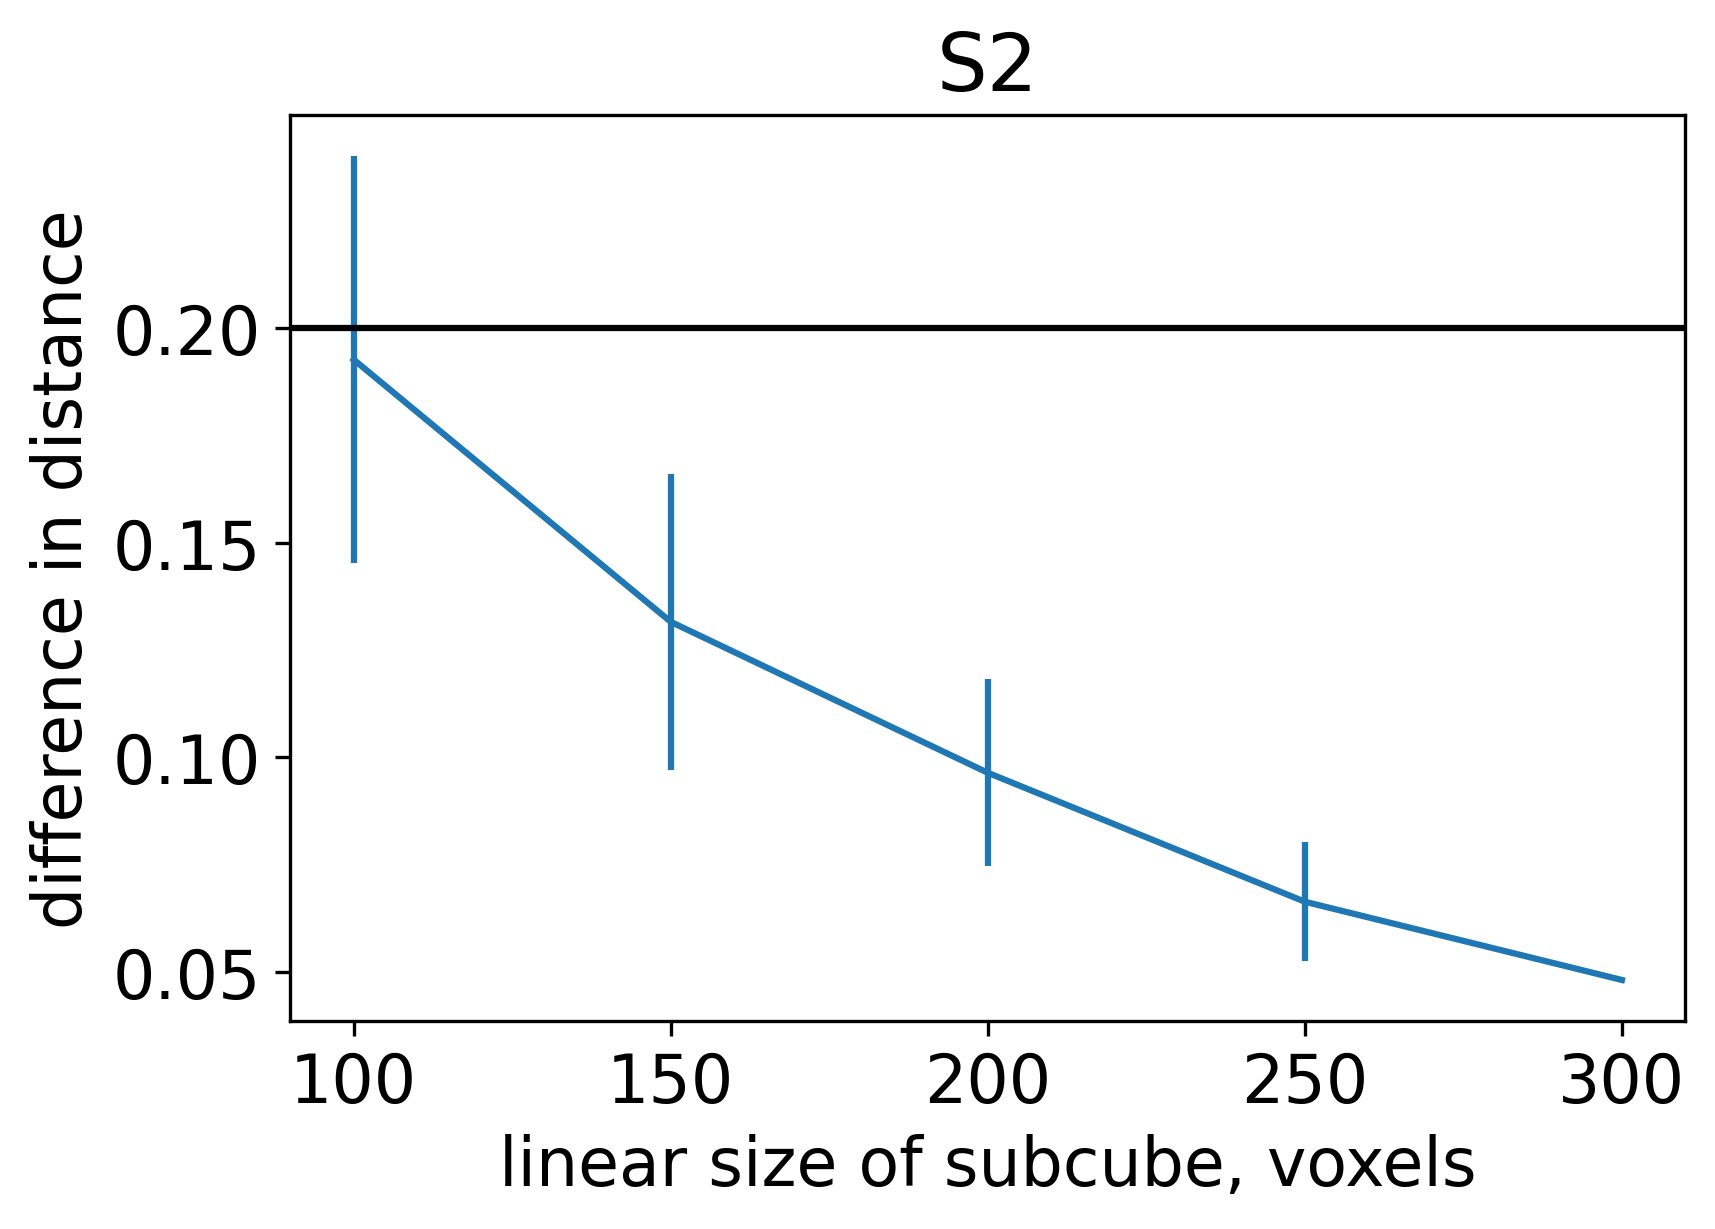

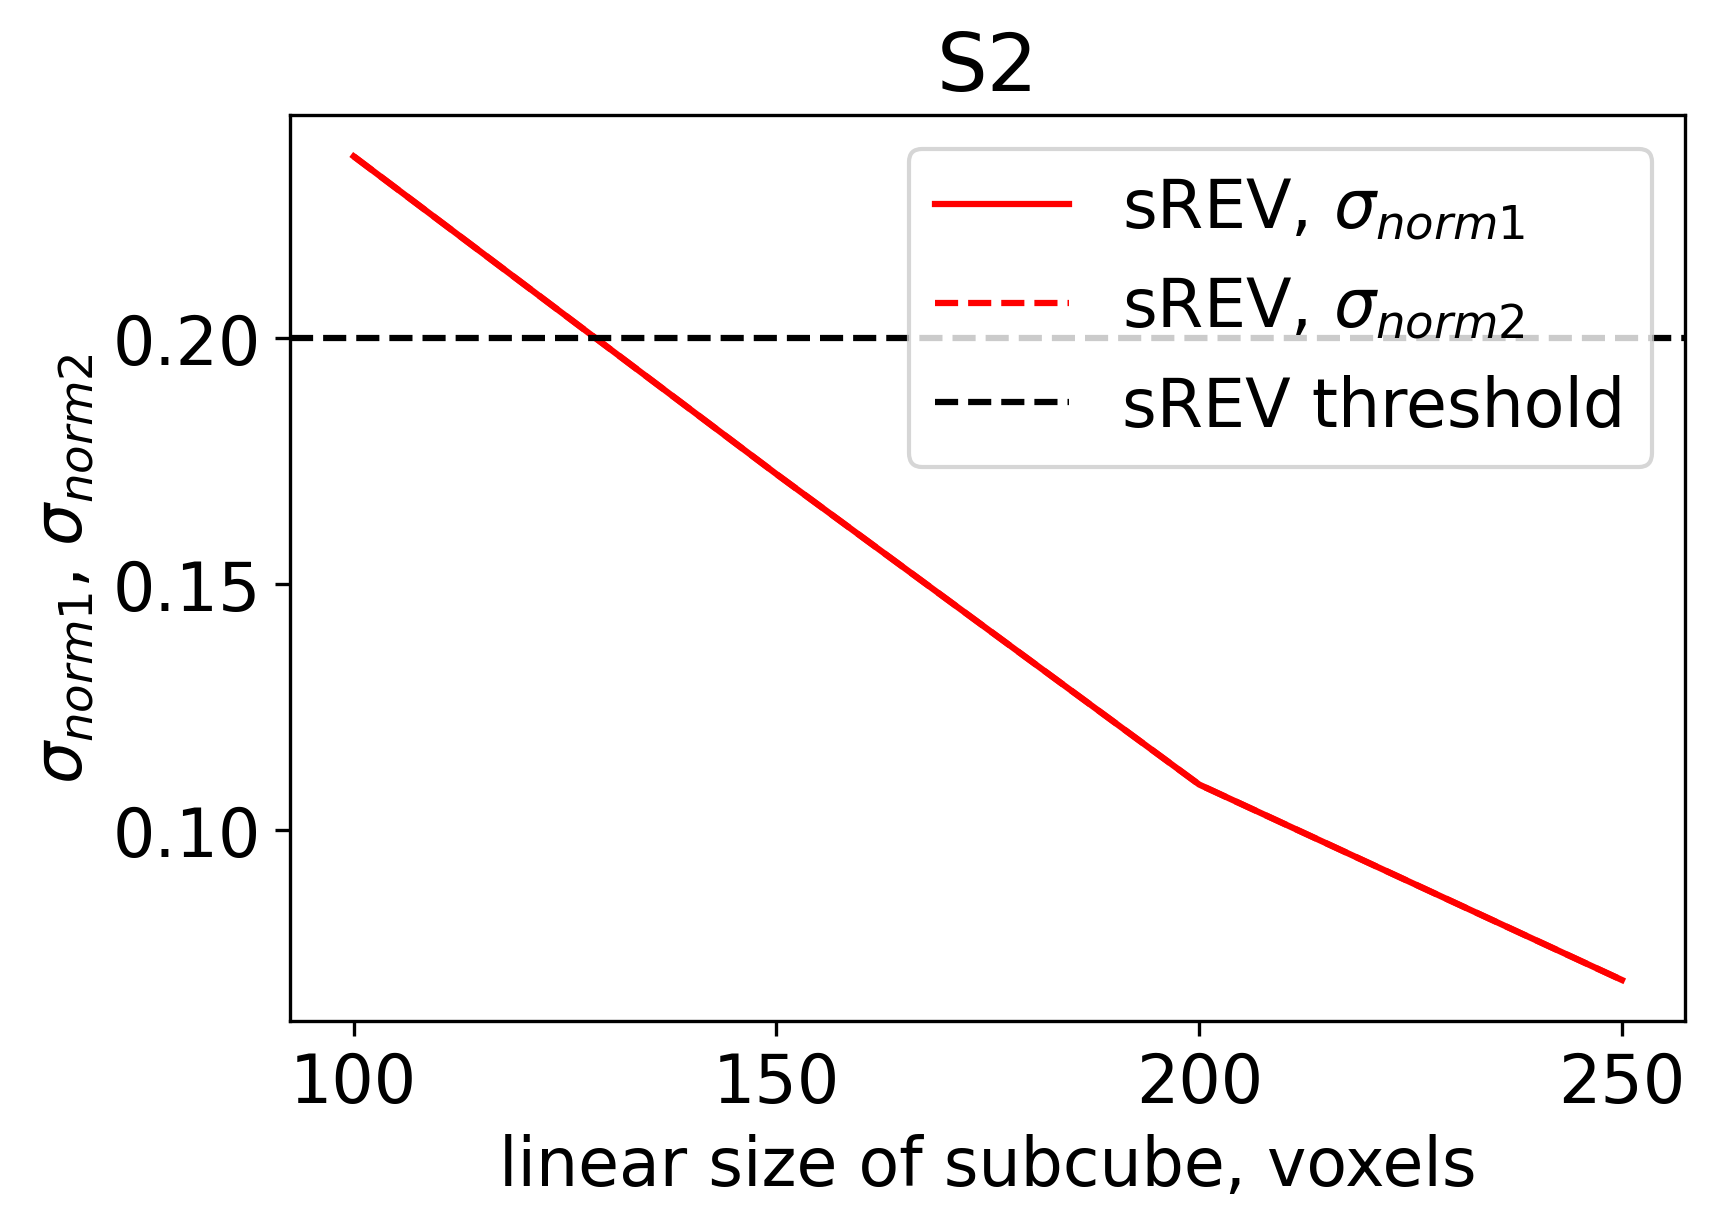

In [17]:
analyzer.show_results()

In [20]:
#Example of REV analysis of histogram-based CF
norm = 2  #Norm of vectors used in REV analysis. The same, as parameter 'ord' in numpy.linalg.norm function; 
          #default: 2.
factor = 1 #Factor defines how many bins are in linear size of one voxel, default: 1.

vectorizer = HistVectorizer(factor = factor, norm = norm)

metric = ChordLength(vectorizer = vectorizer, n_threads = n_threads, show_time = show_time)
analyzer = REVAnalyzer(metric = metric, image = image, cut_step = cut_step, sREV_max_size = sREV_max_size,
                       datadir = datadir, outputdir = outputdir)
analyzer.generate()


cut  cut0_50 , run time: 
--- 13.356871366500854 seconds ---
cut  cut1_50 , run time: 
--- 13.456149578094482 seconds ---
cut cut   cut3_50cut2_50 , run time:  
--- 13.367709875106812 seconds ---, run time: 

--- 13.45993185043335 seconds ---
cut  cut5_50 , run time: 
--- 13.252282619476318 seconds ---
cut  cut4_50 , run time: 
--- 13.414000988006592 seconds ---
cut  cut7_50 , run time: 
--- 13.362535953521729 seconds ---
cut  cut cut6_50  cut8_50, run time:  
, run time: --- 13.511033058166504 seconds ---
--- 13.348690748214722 seconds ---

cut  cut0_100 , run time: 
--- 13.523483991622925 seconds ---
cut  cut2_100 , run time: 
--- 13.627476215362549 seconds ---
cut  cut1_100 , run time: 
--- 13.729989528656006 seconds ---
cut  cut4_100 , run time: 
--- 13.526194334030151 seconds ---
cut  cut5_100 , run time: 
--- 13.472930908203125 seconds ---
cut  cut6_100 , run time: 
--- 13.687440633773804 seconds ---
cut  cut7_100 , run time: 
--- 13.611294031143188 seconds ---
cut  cut3_100 , ru

In [21]:
analyzer.vectorize()
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{100: 0.20531071088659092, 150: 0.08401380571812521, 200: 0.045152157602068206, 250: 0.022196675764681106, 300: 0.015506446474604214}
{100: 0.08929179960269083, 150: 0.03631294616535482, 200: 0.01833593932556664, 250: 0.006583402968859331}
{100: 0.4464589980134541, 150: 0.18156473082677407, 200: 0.0916796966278332, 250: 0.032917014844296655}
{100: 0.4349105763508541, 150: 0.18156473082677407, 200: 0.0916796966278332, 250: 0.032917014844296655}


In [22]:
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

150
150
150


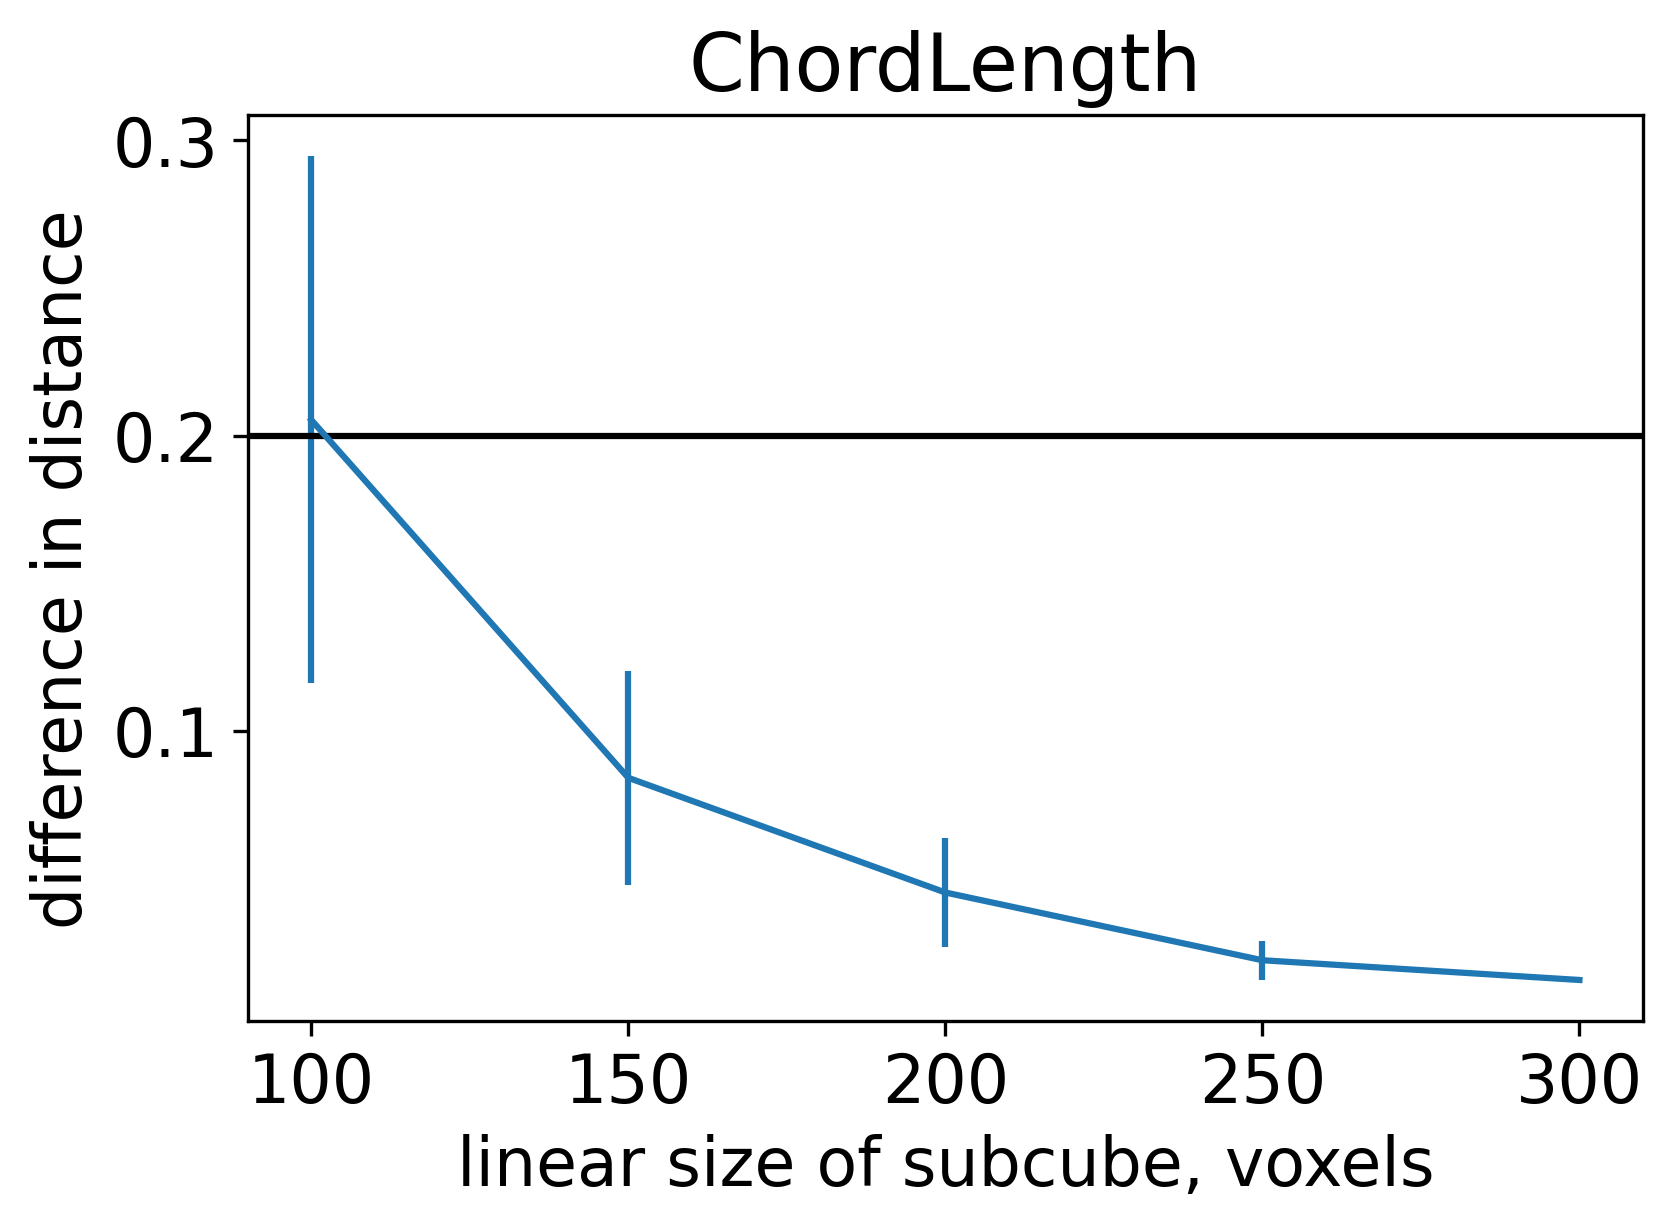

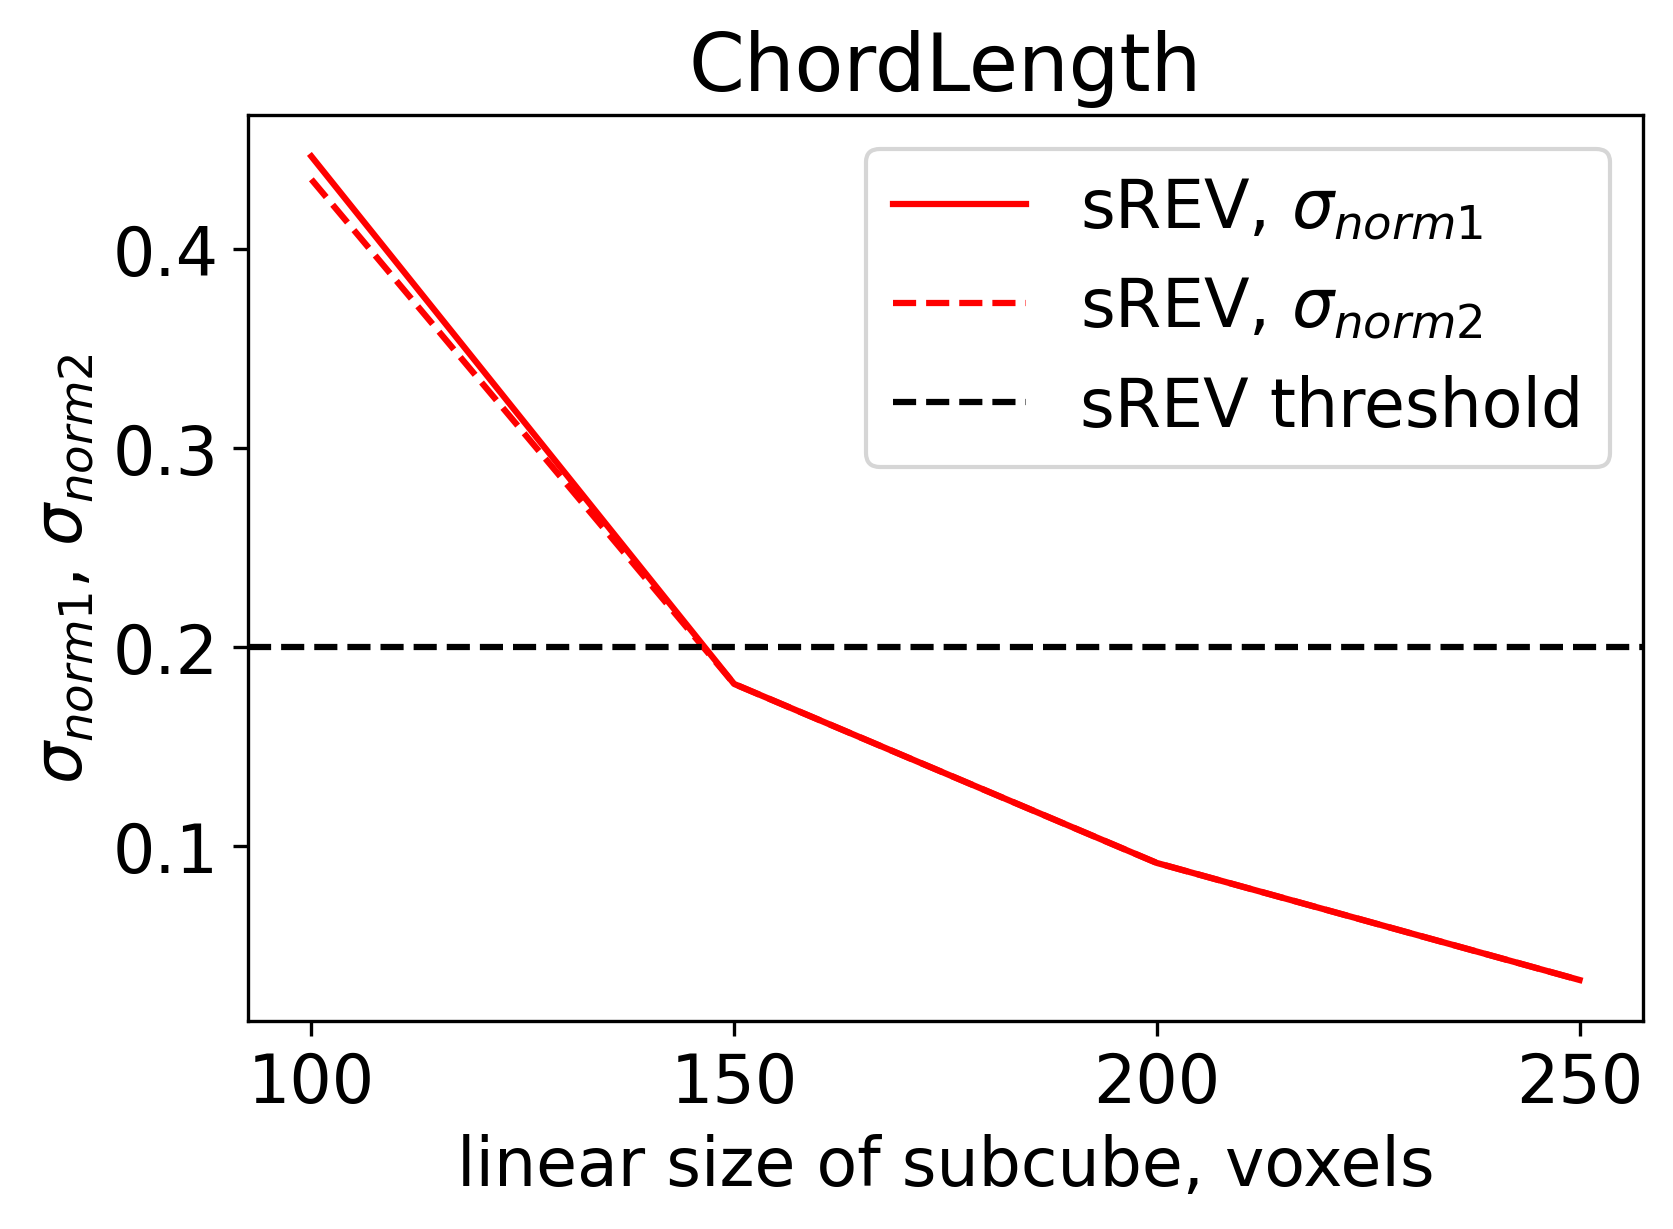

In [23]:
analyzer.show_results()